In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from scipy import stats
from tqdm import  tqdm_notebook
%matplotlib inline



In [10]:
train_dir = './train'

plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style

plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率

In [7]:
images = []
for root, dirs, files in os.walk(train_dir):
    # 去除隐藏文件
    if '.DS_Store' in files:
        files.remove('.DS_Store')
    for file in files:
        images.append(file)

In [8]:
images.sort()
images[0]

'1000_IRO2.png'

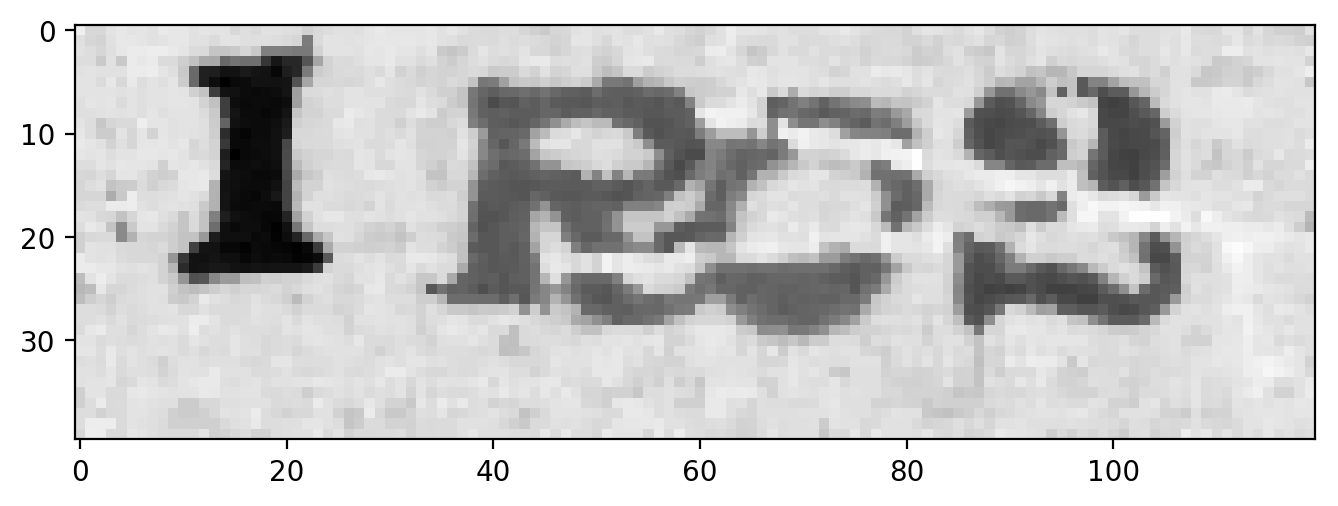

In [16]:
img = cv2.imread(os.path.join(train_dir, images[0]), 0)
plt.imshow(img)
plt.show()

In [17]:
number = len(images)
# number = 10
height, length = img.shape
number, height, length

(4000, 40, 120)

In [19]:
# 创建背景提取器
img_background_buffer = np.zeros((number, height, length))

# 读取所有图片
for i in tqdm_notebook(range(number)):
    image = images[i]
    # 读取图片
    img_buffer = cv2.imread(os.path.join(train_dir, image), 0)
    # 直方图均衡化
    img_buffer = cv2.equalizeHist(img_buffer)
    # 存入buffer中
    img_background_buffer[i] = img_buffer

# 取平均背景，效果较差
# img_background = img_background / len(images)


In [20]:
# 每个像素赋值为所有图片该像素位置的中位数
img_median = np.zeros((height, length))

# 计算中位数
img_median = np.median(img_background_buffer, axis = 0)


In [21]:
# 计算平均数
img_avg = np.average(img_background_buffer, axis = 0)

# 计算标准差
img_deviation = np.average(np.abs(img_background_buffer - img_avg), axis = 0)

# 计算方差
img_var = np.square(img_deviation)

# orgin - img_avg
# np.apply_along_axis((lambda x: x + 2), 0, a)

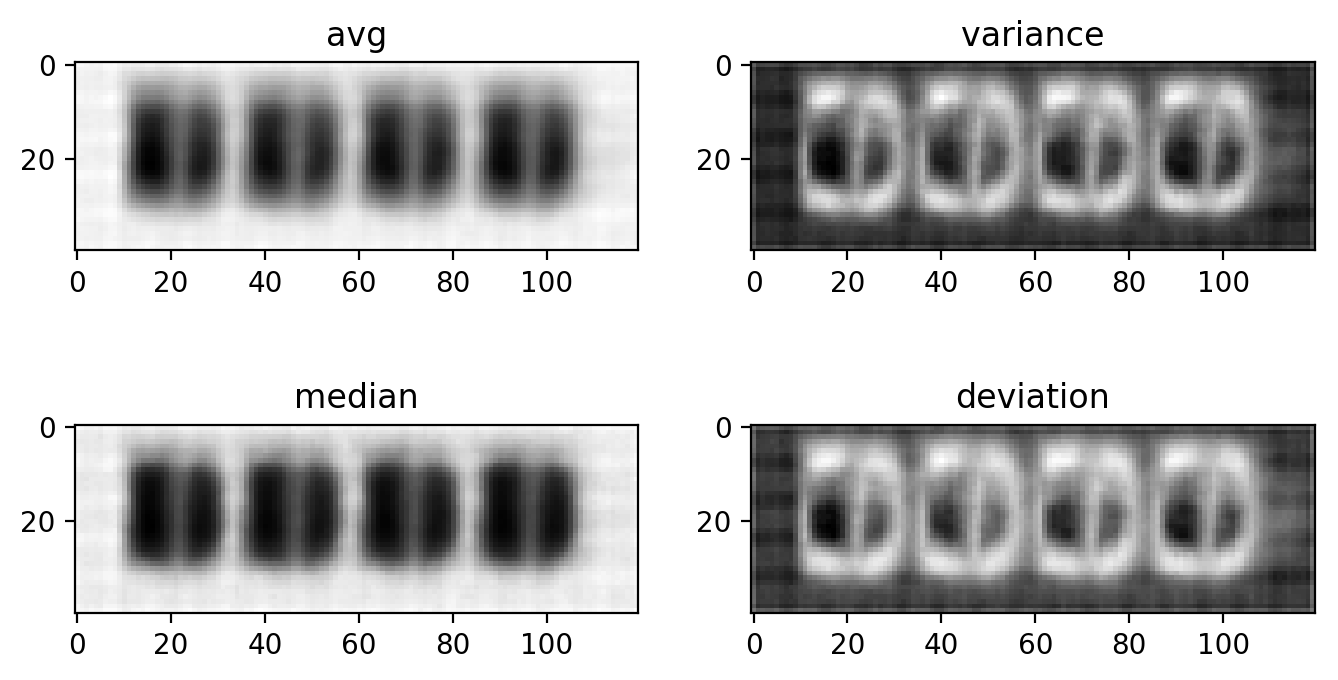

In [22]:
plt.subplots_adjust(hspace= 0.5)
plt.subplot(221, title = "avg")
plt.imshow(img_avg)
plt.subplot(222, title = 'variance')
plt.imshow(img_var)
plt.subplot(223, title = 'median')
plt.imshow(img_median)
plt.subplot(224, title = 'deviation')
plt.imshow(img_deviation)
plt.show()

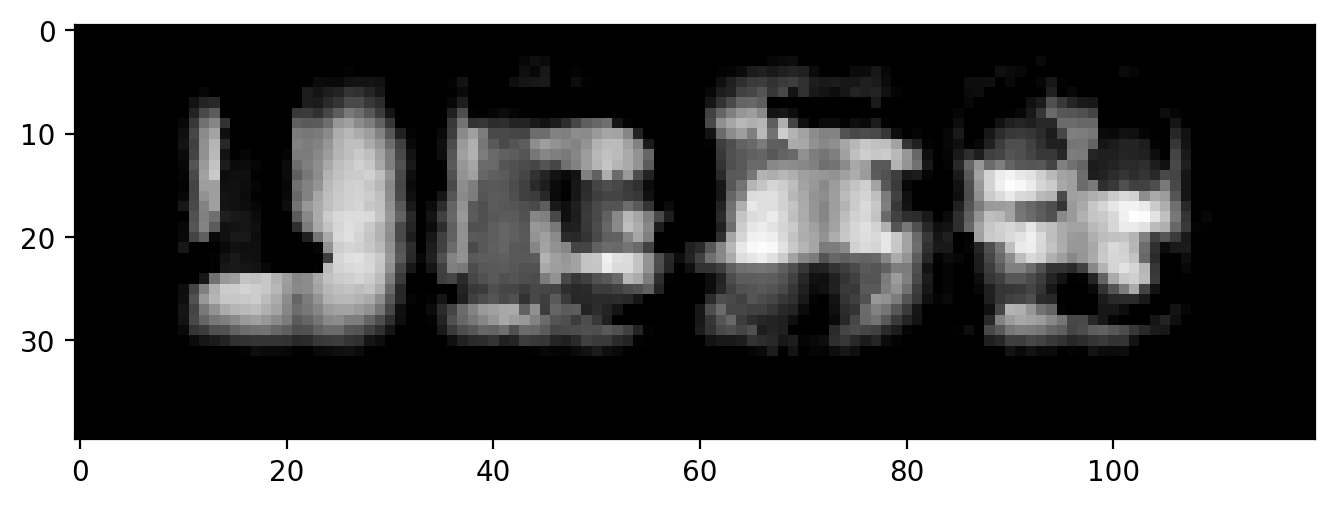

In [25]:
plt.imshow(cv2.subtract(img, img_median.astype(np.uint8)))

In [97]:
i = 16
# 读取一张预处理好的图像
orgin = cv2.imread(os.path.join(train_dir, images[i]), 0)
# 直方图均衡化
# orgin = cv2.equalizeHist(orgin)
# 中值滤波
# orgin = cv2.medianBlur(orgin, 5)
# 计算其概率密度, 若方差为0，则置为1，使得对应像素值小于1，转为整数时归零
# stats.norm.pdf 参数为 x，均值，标准差
prob = stats.norm.pdf(orgin, img_avg, np.where(img_deviation == 0, 100, img_deviation))

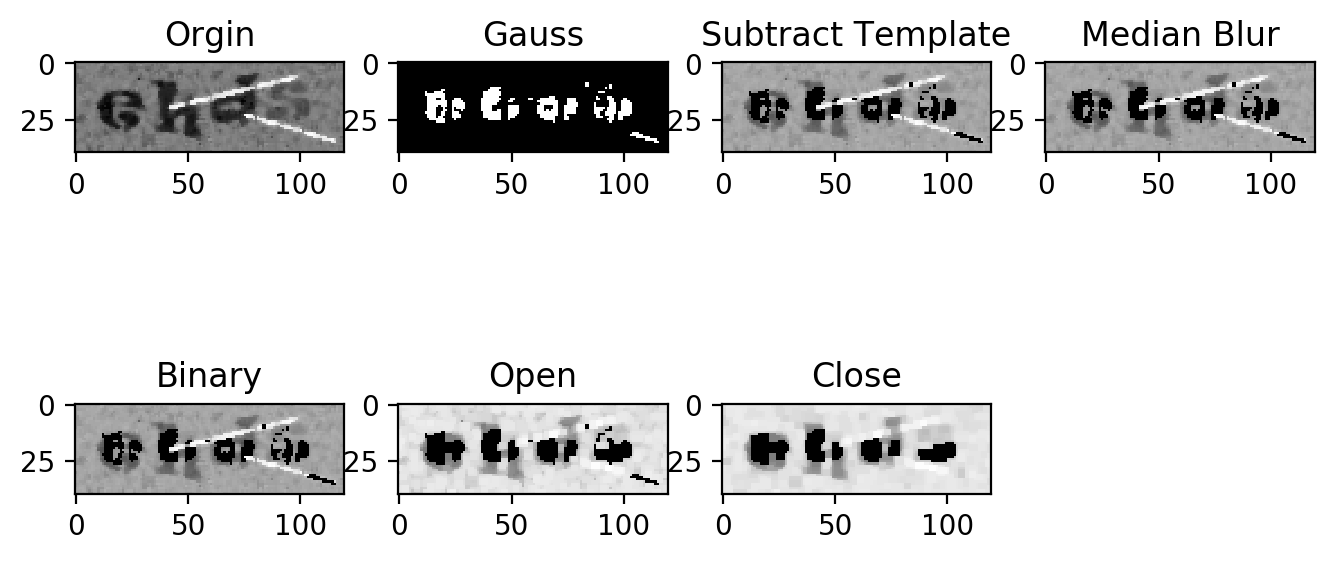

In [98]:
# 调整子图布局
plt.subplots_adjust(hspace= 0.3)
plt.subplot(241, title = 'Orgin')
plt.imshow(orgin)
plt.subplot(242, title = 'Gauss')

# 筛选概率密度小于阈值的像素点，置为前景
img_gauss = np.where(prob > 0.007,  255, 0)
plt.imshow(img_gauss)

# 显示原始图像与背景模板相减的结果
plt.subplot(243, title = 'Subtract Template')
img_front = cv2.subtract(orgin, img_gauss.astype(np.uint8))
plt.imshow(img_front)

# 显示滤波图像
plt.subplot(244, title = 'Median Blur')
# img_front = cv2.medianBlur(img_front, 9)
plt.imshow(img_front)

# 显示二值化图像
plt.subplot(245, title = 'Binary')
# t, img_front = cv2.threshold(img_front, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(img_front)

# 创建运算核
k = np.ones((3, 3), np.uint8)

# 显示高斯处理后开运算结果
img_front = cv2.morphologyEx(img_front.astype(np.uint8), cv2.MORPH_OPEN, k)
plt.subplot(246, title = 'Open')
plt.imshow(img_front)

# 显示闭运算结果
img_front = cv2.morphologyEx(img_front.astype(np.uint8), cv2.MORPH_CLOSE, k, iterations = 1)
plt.subplot(247, title = 'Close')
plt.imshow(img_front)

plt.show()

In [99]:
images[i]

'1015_ehds.png'